In [1]:
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# Open file, read each line
file = open("K_metrics.txt", "r")
lines = file.read().splitlines()

In [3]:
k_data = []
for k in range(len(lines) // 3):
    # Extract k
    k_line = lines[k*3]
    k_val = k_line.split(": ")[1]
    
    # Extract avg loss
    loss_line = lines[k*3 + 1]
    loss_val = loss_line.split(": ")[1]
    
    # Extract how often each k chosen
    k_probabilities_line = lines[k*3 + 2]
    k_probabilities = k_probabilities_line.split(": ")[1].split()
    
    k_data.append([int(k_val), {"avg loss":float(loss_val), "k_chosen_percent":list(map(float, k_probabilities))}])
    
k_data.sort()
k_data

[[1, {'avg loss': 0.030297844836139797, 'k_chosen_percent': [1.0]}],
 [2, {'avg loss': 0.05377352433982142, 'k_chosen_percent': [0.6186, 0.3814]}],
 [3,
  {'avg loss': 0.030960211103084362,
   'k_chosen_percent': [0.414, 0.3886, 0.1974]}],
 [5,
  {'avg loss': 0.032775993458492136,
   'k_chosen_percent': [0.187, 0.2822, 0.2294, 0.1924, 0.109]}],
 [7,
  {'avg loss': 0.03987341963429591,
   'k_chosen_percent': [0.157, 0.1766, 0.1804, 0.2172, 0.0964, 0.12, 0.0524]}],
 [10,
  {'avg loss': 0.027579499657158044,
   'k_chosen_percent': [0.0316,
    0.1286,
    0.1342,
    0.1696,
    0.1318,
    0.1584,
    0.066,
    0.0742,
    0.0714,
    0.0342]}],
 [15,
  {'avg loss': 0.04580317153894961,
   'k_chosen_percent': [0.0098,
    0.0766,
    0.173,
    0.1066,
    0.0694,
    0.0958,
    0.1298,
    0.0496,
    0.021,
    0.0482,
    0.0584,
    0.0522,
    0.0374,
    0.0286,
    0.0436]}]]

In [4]:
ks = [x[0] for x in k_data]
losses = [x[1]["avg loss"] for x in k_data]
probs = [x[1]["k_chosen_percent"] for x in k_data]

I have collected data on k = [1, 2, 3, 5, 7, 10, 15]


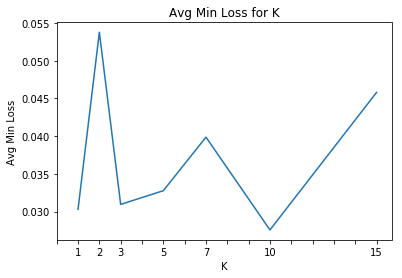

In [32]:
print("I have collected data on k =", ks)
plt.plot(ks, losses)
plt.xlabel("K")
plt.ylabel("Avg Min Loss")
ticks = [x if x in ks else None for x in range(0,ks[-1]+1)]
plt.xticks(range(ks[-1]+1), ticks)
# plt.ylim([0,.05])
title = "Avg Min Loss for K"
plt.title(title)
plt.savefig("figures/" + title + ".png")
plt.show()

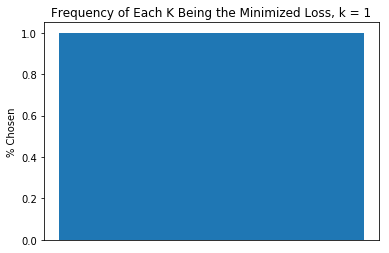

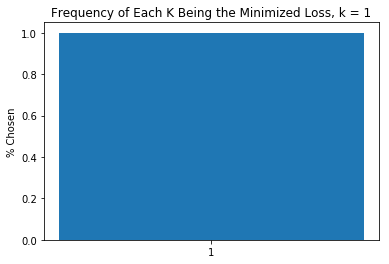

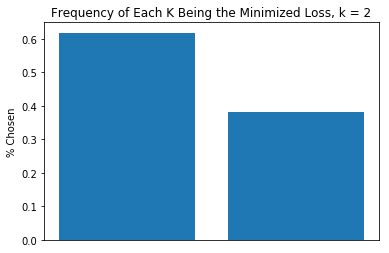

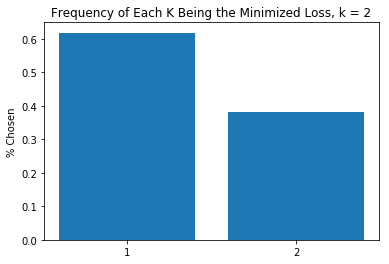

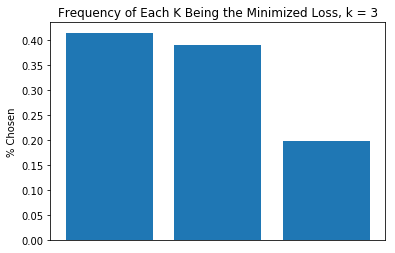

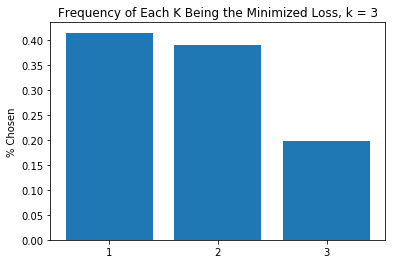

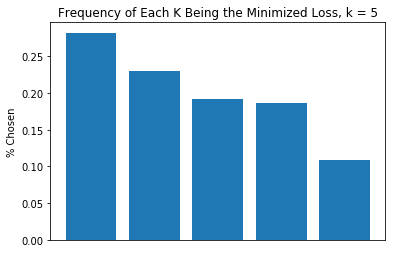

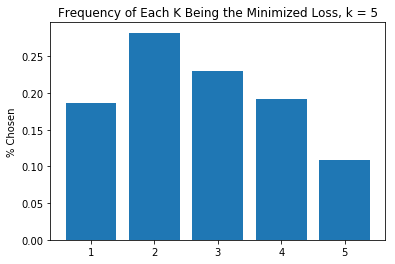

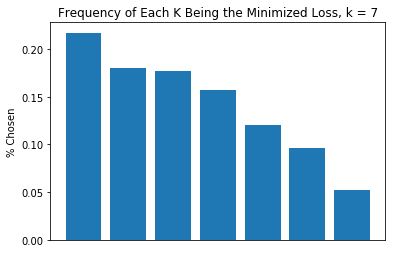

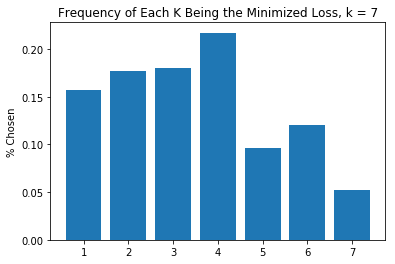

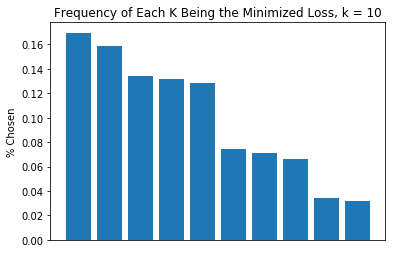

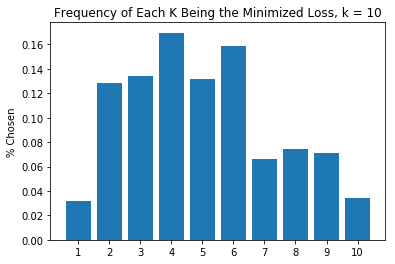

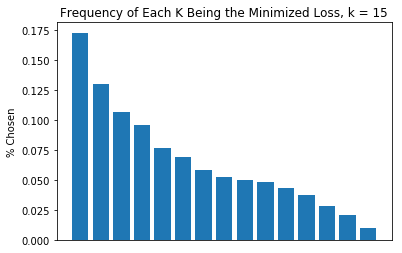

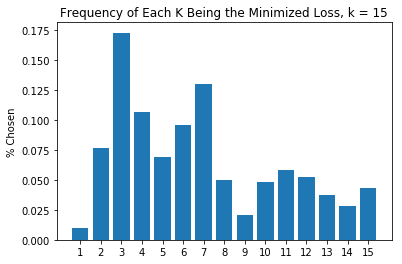

In [11]:
for i, k in enumerate(ks):
    plt.bar(np.arange(k), sorted(probs[i], reverse=True))
    title = "Frequency of Each K Being the Minimized Loss, k = " + str(k)
    plt.title(title)
    plt.ylabel("% Chosen")
    plt.xticks([])
    plt.savefig("figures/" + title + "_ranked.png")
    plt.show()
    plt.close()
    
    plt.bar(np.arange(k), probs[i])
    title = "Frequency of Each K Being the Minimized Loss, k = " + str(k)
    plt.title(title)
    plt.ylabel("% Chosen")
    plt.xticks(range(k), range(1,k+1))
    plt.savefig("figures/" + title + ".png")
    plt.show()
    plt.close()


In [7]:
# import os
# import cv2
# from tqdm import tnrange, tqdm_notebook, tqdm

# def load_image(path):
#     img = cv2.imread(path[0])
    
#     # Make sure all images are 256 x 256 by cropping them
#     r, c = img.shape[:2]
#     r_diff = (r - 256) // 2
#     c_diff = (c - 256) // 2
#     cropped = img[r_diff:256 + r_diff, c_diff:256 + c_diff] 
#     return cropped

# def load_images(path, n_images):
#     if n_images < 0:
#         n_images = float("inf")
#     all_image_paths = list_image_files(path)
#     images_l, images_ab = [], []
#     images_lab = []
    
#     # Initialize a progress bar with max of n_images
#     pbar = tqdm_notebook(total = n_images, desc="Loading Images...")
    
#     for path in zip(all_image_paths):
#         img = load_image(path)
#         lab_img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
#         lab_img = preprocess_image(lab_img)
#         images_lab.append(lab_img)
        
#         images_loaded = len(images_lab)
        
#         # Increase progress by one
#         pbar.update(1)
        
#         if images_loaded > n_images - 1: 
#             break

#     return images_lab

# RESHAPE = (256,256)

# def preprocess_image(cv_img):
#     img = (cv_img - 127.5) / 127.5
#     return img

# def deprocess_image(img):
#     img = (img * 127.5) + 127.5
#     return img.astype('uint8')

# def list_image_files(directory):
#     files = sorted(os.listdir(directory))
#     return [os.path.join(directory, f) for f in files if is_an_image_file(f)]

# def is_an_image_file(filename):
#     IMAGE_EXTENSIONS = ['.png', '.jpg', '.jpeg']
#     for ext in IMAGE_EXTENSIONS:
#         if ext in filename:
#             return True
#     return False

In [8]:
# # Read in images
# data = load_images('lsun/train', 100)

In [9]:
# plt.imshow(data[0])

In [10]:
# from sklearn.decomposition import PCA 
  
# pca = PCA(3) 
# pca.fit(zoo_data) 
  
# pca_data = pd.DataFrame(pca.transform(zoo_data)) 
  
# print(pca_data.head())